<a href="https://colab.research.google.com/github/UJWAL-SHAH/ML/blob/master/Lab%20Work/ML_Lab2_J078.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UJWAL SHAH**

**ROLL NO : J078**

**EXPERIMENT 2/ LAB 2**

In [2]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**EXERCISE PART 1**

**a.	Import dataset store it as dataframe in python**

In [ ]:
filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"


**b.	Add column headers to dataset**

In [ ]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
"drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
"num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
"peak-rpm","city-mpg","highway-mpg","price"]

**c.	Read the first 5 lines and display**

In [ ]:
automob=pd.read_csv(filename,names=headers)

In [ ]:
automob.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


**d.	Are there missing data? Or illegal characters in the dataframe?**

**Yes,There are illegal values of '?' in the dataset**

**e.	Replace the character “?” with nan**

In [ ]:
automob.replace("?",np.nan,inplace=True)#To replace ? with NAN

In [ ]:
automob.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


**f.	Count missing values in each column and print it with column name**

In [ ]:
missing = automob.isnull()
missing.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#to count null valus in rach columns

for columns in missing.columns.values.tolist():
  print(columns, missing[columns].value_counts())

symboling False    205
Name: symboling, dtype: int64
normalized-losses False    164
True      41
Name: normalized-losses, dtype: int64
make False    205
Name: make, dtype: int64
fuel-type False    205
Name: fuel-type, dtype: int64
aspiration False    205
Name: aspiration, dtype: int64
num-of-doors False    203
True       2
Name: num-of-doors, dtype: int64
body-style False    205
Name: body-style, dtype: int64
drive-wheels False    205
Name: drive-wheels, dtype: int64
engine-location False    205
Name: engine-location, dtype: int64
wheel-base False    205
Name: wheel-base, dtype: int64
length False    205
Name: length, dtype: int64
width False    205
Name: width, dtype: int64
height False    205
Name: height, dtype: int64
curb-weight False    205
Name: curb-weight, dtype: int64
engine-type False    205
Name: engine-type, dtype: int64
num-of-cylinders False    205
Name: num-of-cylinders, dtype: int64
engine-size False    205
Name: engine-size, dtype: int64
fuel-system False    205
Name: 

OR WE CAN USE THIS ALSO

In [ ]:
automob.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

OR CAN USE THIS ALSO

In [ ]:
#missing_values_table(automob)

**h.	Normalized losses,bore,stroke,horsepower,peak-rpm, - replace missing with mean of the column**

In [ ]:
avg_normloss=automob['normalized-losses'].astype('float').mean(axis=0)
avg_normloss  #axis 0 = column & axis 1=row 
automob['normalized-losses'].replace(np.nan,avg_normloss,inplace=True)

In [ ]:
#stroke,horsepower and bore
avg_stroke=automob['stroke'].astype('float').mean(axis=0)
avg_stroke  #axis 0 = column & axis 1=row 
automob['stroke'].replace(np.nan,avg_stroke,inplace=True)

In [ ]:
avg_horsepower=automob['horsepower'].astype('float').mean(axis=0)
avg_horsepower
automob['horsepower'].replace(np.nan,avg_horsepower,inplace=True)

In [ ]:
avg_bore=automob['bore'].astype('float').mean(axis=0)
avg_bore
automob['bore'].replace(np.nan,avg_bore,inplace=True)

In [ ]:
avg_peak_rm=automob['peak-rpm'].astype('float').mean(axis=0)
avg_peak_rm
automob['peak-rpm'].replace(np.nan,avg_peak_rm,inplace=True)

**i.	Num-of-doors replace missing with most frequent value in the column**

In [ ]:
automob['num-of-doors'].value_counts()
automob['num-of-doors'].value_counts().idxmax()
automob['num-of-doors'].replace(np.nan,'four',inplace=True)

**g.	Delete price rows that have missing data**

In [ ]:
automob.dropna(subset=['price'],axis=0,inplace=True)
#This is done to reset the index s some values will be dropped 
#so that index needs to be resetted

**j.	Reset the index of dataframe**

In [ ]:
automob.reset_index(drop=True, inplace=True)

In [ ]:
automob.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


**k.	Check datatype of columns and convert numeric/quantitative variables to float or int**

In [ ]:
automob.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [ ]:
automob["normalized-losses"]=automob["normalized-losses"].astype('float')
automob["bore"]=automob["bore"].astype('float')
automob["stroke"]=automob["stroke"].astype('float')
automob["horsepower"]=automob["horsepower"].astype('float')
automob["peak-rpm"]=automob["peak-rpm"].astype('float')
automob["price"]=automob["price"].astype('float')


OR CAN DO 

In [ ]:
automob[['normalized-losses','stroke','bore','price','peak-rpm','horsepower']]=automob[['normalized-losses','stroke','bore','price','peak-rpm','horsepower']].astype('float')

In [ ]:
automob.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

**l.	Transform city-mpg and highway-mpg into liters/100km using conversion formula:
L/100km = 235/mpg i.e. create two new column “city-L/100km” and “highway-L/100km”**

In [ ]:
automob['city-L/100km']=235/automob['city-mpg']
automob['highway-L/100km']=235/automob['highway-mpg']

In [ ]:
automob.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,10.681818


**Normalize columns length, width, height so that their values range from 0 to 1.         
                        Hint:  Replace original values with original_value/max_value**

In [ ]:
#now normalize the values to 0-1 range
#resons:
#no column /variable should dominate
#helps for faster convergence .....in gradient descent

automob['length']=automob['length']/automob['length'].max()
automob['width']=automob['width']/automob['width'].max()
automob['height']=automob['height']/automob['height'].max()

In [ ]:
automob.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
196,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,0.907256,0.956944,0.928094,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,10.217391,8.392857
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,0.907256,0.955556,0.928094,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,12.368421,9.400000
198,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,0.907256,0.956944,0.928094,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,13.055556,10.217391
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,0.907256,0.956944,0.928094,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,9.038462,8.703704
200,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,0.907256,0.956944,0.928094,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,22625.0,12.368421,9.400000


**m.	Plot the histogram of horsepower to see its distribution**

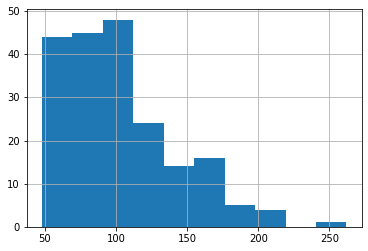

In [ ]:
#plotting histogram to Horsepower
automob['horsepower'].hist()

**n.	Create three equal sized bins “low”, “medium”, “high” and organize values in column horsepower into new column “horsepower-binned”**

In [ ]:
bin_labels_3 = ['low', 'medium', 'high']
automob['horsepower-binned'] = pd.qcut(automob['horsepower'], q=3,labels=bin_labels_3)
automob


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,8.703704,medium
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,8.703704,medium
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,9.038462,high
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,7.833333,medium
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,10.681818,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,0.907256,0.956944,0.928094,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,10.217391,8.392857,high
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,0.907256,0.955556,0.928094,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,12.368421,9.400000,high
198,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,0.907256,0.956944,0.928094,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,13.055556,10.217391,high
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,0.907256,0.956944,0.928094,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,9.038462,8.703704,medium


In [ ]:
automob['horsepower-binned'].value_counts()

low       68
medium    67
high      66
Name: horsepower-binned, dtype: int64

**o.	Plot distribution of “horsepower-binned”**

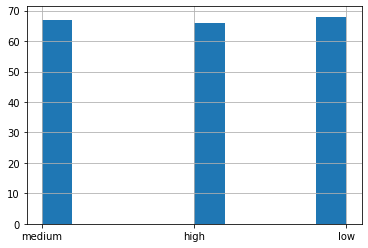

In [ ]:
#plotting histogram to Horsepower binned
automob['horsepower-binned'].hist()

In [ ]:
automob.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,8.703704,medium
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,8.703704,medium
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,9.038462,high
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,7.833333,medium
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,10.681818,high


**p.	Convert “fuel-type” into one-hot-encoded variables. Repeat same for “aspiration” and then drop columns “fuel-type” and “aspiration”**

In [ ]:
#Indicator variables
newauto=pd.get_dummies(automob['fuel-type'])
newauto
newauto.rename(columns={"gas": "Fuel Type-Gas" ,"diesel":"Fuel Type-diesel"},inplace=True)
newauto

,Fuel Type-diesel,Fuel Type-Gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
196,0,1
197,0,1
198,0,1
199,1,0


In [ ]:
automob = pd.concat([automob, newauto], axis=1)
automob
automob.drop('fuel-type',inplace=True,axis=1)


In [ ]:
automob

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,Fuel Type-diesel,Fuel Type-Gas
0,3,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,8.703704,medium,0,1
1,3,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,8.703704,medium,0,1
2,1,122.0,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,9.038462,high,0,1
3,2,164.0,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,7.833333,medium,0,1
4,2,164.0,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,10.681818,high,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,volvo,std,four,sedan,rwd,front,109.1,0.907256,0.956944,0.928094,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,10.217391,8.392857,high,0,1
197,-1,95.0,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,0.955556,0.928094,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,12.368421,9.400000,high,0,1
198,-1,95.0,volvo,std,four,sedan,rwd,front,109.1,0.907256,0.956944,0.928094,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,13.055556,10.217391,high,0,1
199,-1,95.0,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,0.956944,0.928094,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,9.038462,8.703704,medium,1,0


In [ ]:
automob['aspiration'].value_counts()
newauto1=pd.get_dummies(automob['aspiration'])
newauto1.rename(columns={"std": "Aspiration-std" ,"turbo":"Aspiration-turbo"},inplace=True)
newauto1

,Aspiration-std,Aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
196,1,0
197,0,1
198,1,0
199,0,1


In [ ]:
automob = pd.concat([automob, newauto1], axis=1)

automob.drop('aspiration',inplace=True,axis=1)
automob

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,Fuel Type-diesel,Fuel Type-Gas,Aspiration-std,Aspiration-turbo
0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,8.703704,medium,0,1,1,0
1,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,8.703704,medium,0,1,1,0
2,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,9.038462,high,0,1,1,0
3,2,164.0,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,7.833333,medium,0,1,1,0
4,2,164.0,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,10.681818,high,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,0.928094,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,10.217391,8.392857,high,0,1,1,0
197,-1,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,0.955556,0.928094,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,12.368421,9.400000,high,0,1,0,1
198,-1,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,0.928094,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,13.055556,10.217391,high,0,1,1,0
199,-1,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,0.928094,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,9.038462,8.703704,medium,1,0,0,1


In [ ]:
#to save the cleaned and preproceesed filed
automob.to_csv('cleaned.csv')



---



**EXERCISE PART 2**

**1.	Import the dataset**

In [4]:
filename='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
automob1=pd.read_csv(filename)
automob1

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,0.955556,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


**2.	Import matplotlib, seaborn, numpy and pandas**

*Already done above*

**3.	See dimensions of data frame and its data types for each column**

In [5]:
print(automob1.shape)
automob1.dtypes

(201, 29)


symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

**4.	Calculate correlation between engine-size and price using corr function**

In [6]:
#find correlation
# positive - x inc, y inc
# neutral -
#negative - x inc, y dec

automob1[['engine-size','price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


**5.	Identify variables with positive or negative correlation with price**

In [7]:
automob1.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


**6.	Identify datatype of “peak-rpm”**

In [8]:
automob1['peak-rpm'].dtypes
#Float

dtype('float64')

**7.	Using seaborn regplot() - plot relation between “engine-size” and “price”. Comment on your observation.**

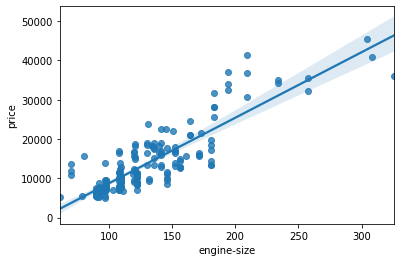

In [9]:
sns.regplot(x="engine-size" ,y="price",data=automob1)

**Observation:As the engine-size increses ,the price increases....There is a linear Relationship between them**

**8.	Identify using regplot() - which other variables can affect “price” and which do not affect it.**

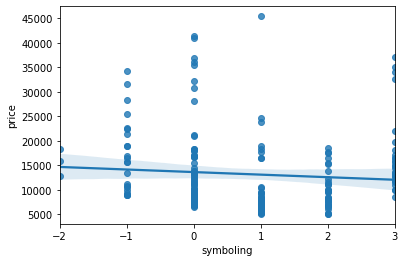

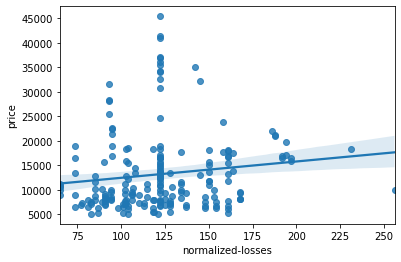

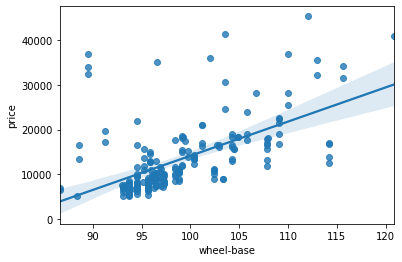

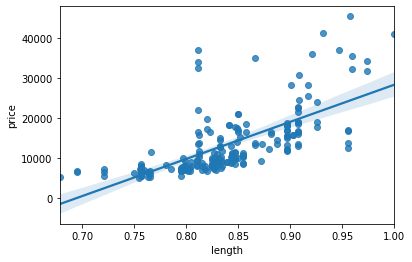

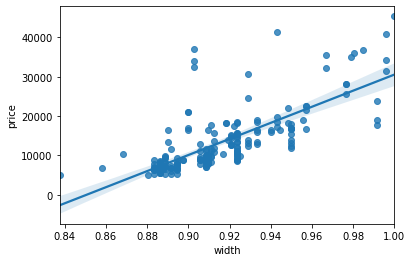

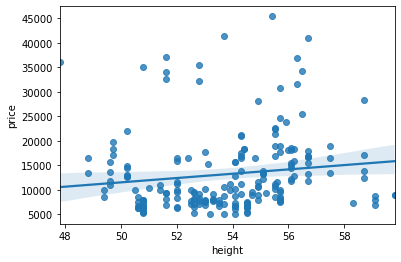

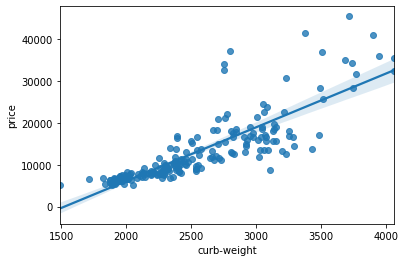

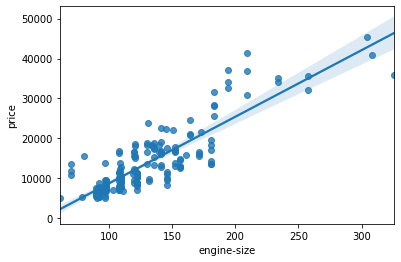

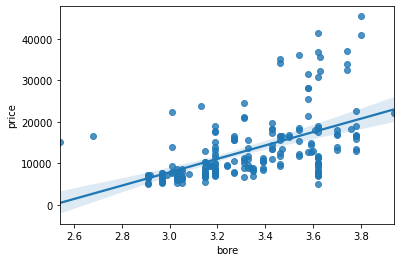

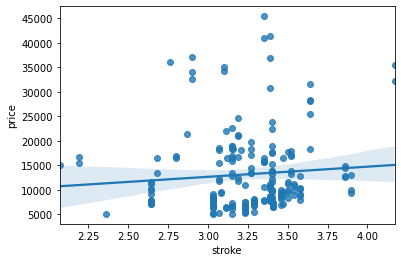

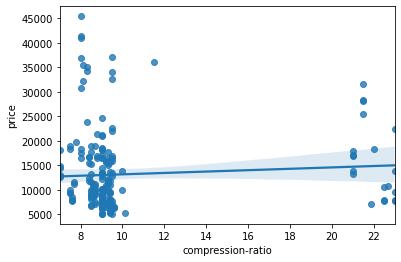

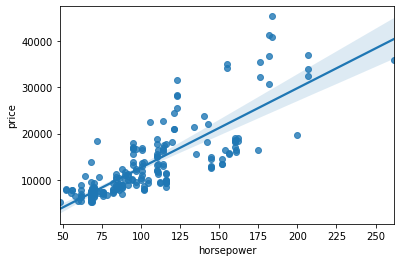

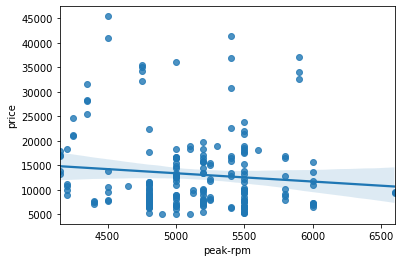

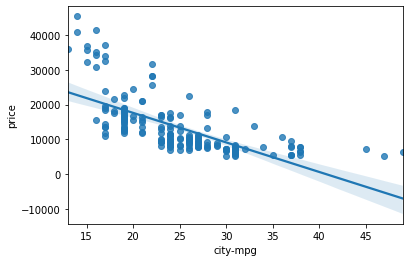

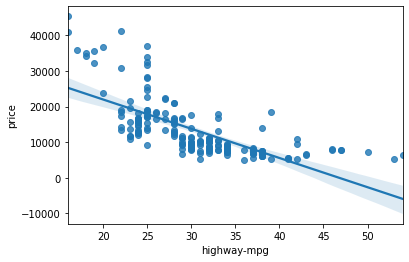

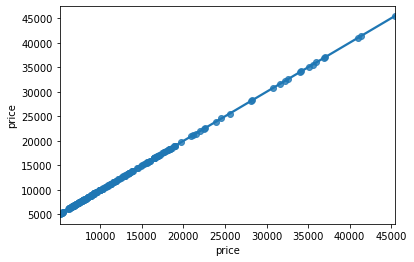

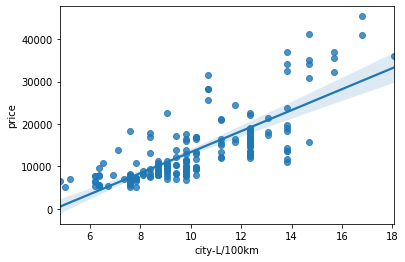

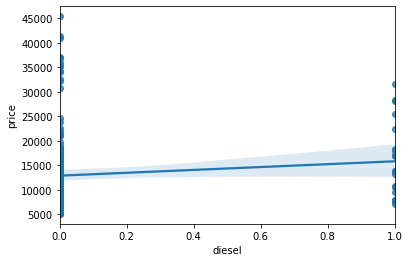

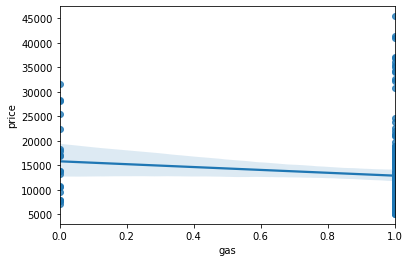

In [11]:
for i in automob1.describe().columns:
    sns.regplot(x=automob1[i], y=automob1['price'])
    plt.show()

In [13]:
#horespower is positively linearly related to price
#Engine is positively linearly related to price
#curb-weight is positively linearly related to price
#height does NOT affect price of the vehicle 
#and Similarly others can be finded


**9.	Use seaborn pairplot() to identify which variables can affect “price”**

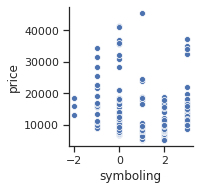

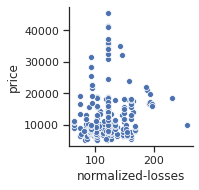

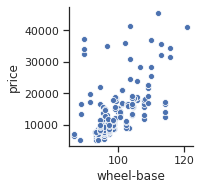

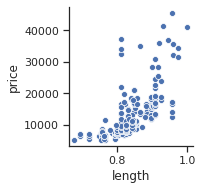

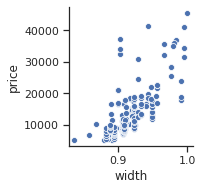

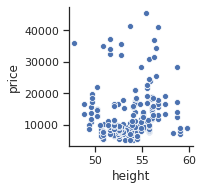

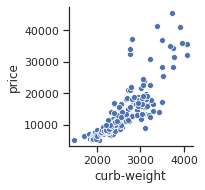

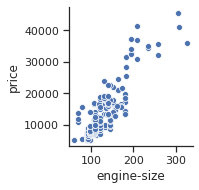

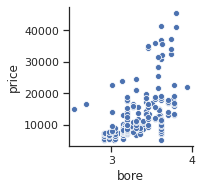

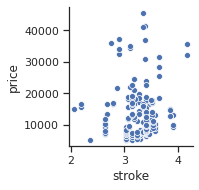

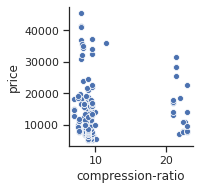

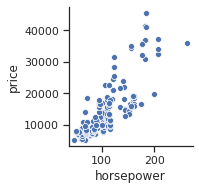

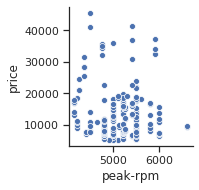

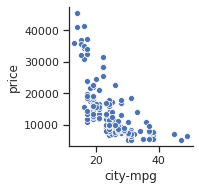

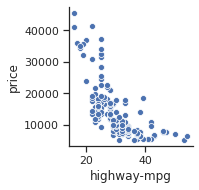

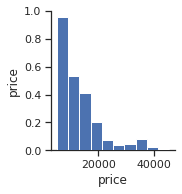

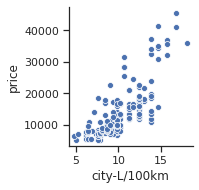

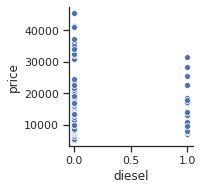

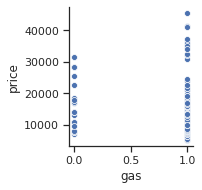

In [18]:
for i in automob1.describe().columns:
  sns.pairplot(x_vars=i,y_vars='price',data=automob1) 

**10.	Draw a heatmap to plot the correlation in the dataframe**

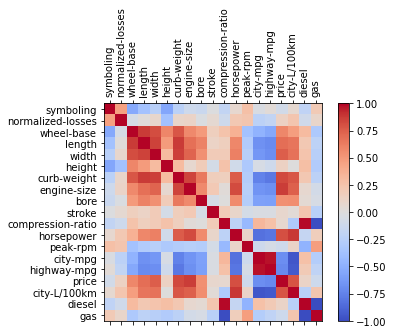

In [ ]:
#optional heatmap

corr= automob1.corr()

# create fig and add subplot
fig = plt.figure()
ax = fig.add_subplot()

# add data inside the sub-plot
#(correlational wala data a& kaunse color type mein chahiye)
cax = ax.matshow(corr, cmap='coolwarm')

#create colobar to show different images of the heatmap
fig.colorbar(cax)

#labelthe heatmap
ticks = np.arange(0,len(corr.columns),1)#length is the no. of columns

ax.set_xticks(ticks)
ax.set_yticks(ticks)

#(optional)
#if no space then rotationof X-axis like horizontal to vertical 
#try to do with and without this then you will come to  know it
plt.xticks(rotation=90)


#label of  x-axis
ax.set_xticklabels(corr.columns)

#label of  y axis
ax.set_yticklabels(corr.columns)

#Show the heatmap
plt.show()

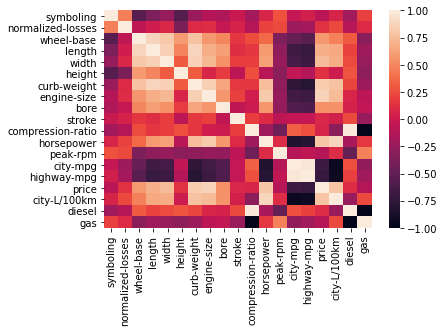

In [ ]:
#OR simply can do this also
corr= automob1.corr()
sns.heatmap(corr)
plt.show()

**11.	With seaborn boxplot() - compare “body-style” with “price”**

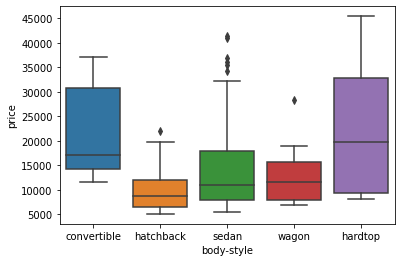

In [ ]:
sns.boxplot(x='body-style',y='price',data=automob1)
#HARDTOP & CONVERTIBLE are hve high mean price as compared to HATCHBAC,SEDAN,WAGON

**12.	Continue for other categorical variables in the dataset**


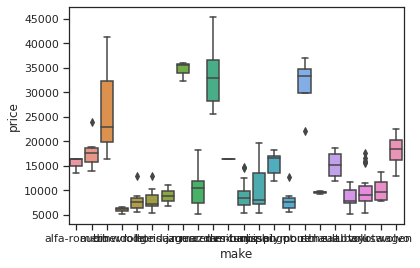

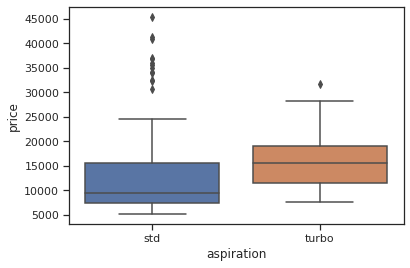

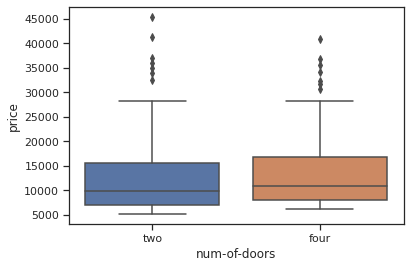

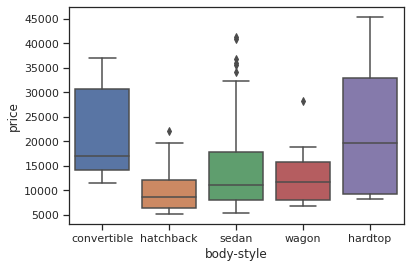

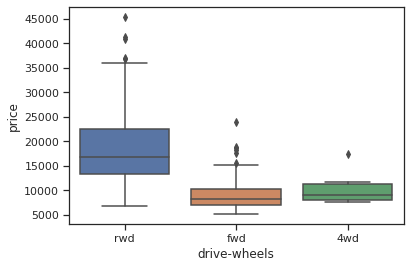

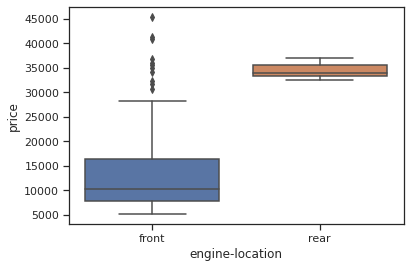

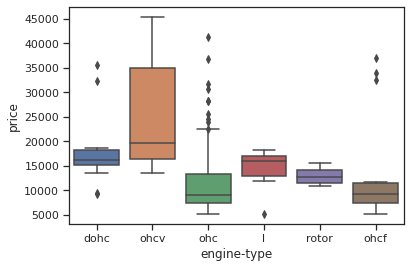

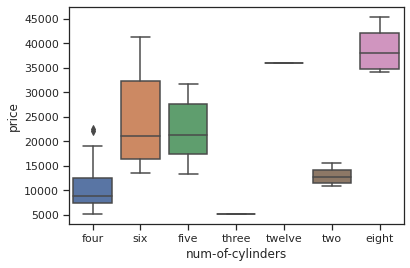

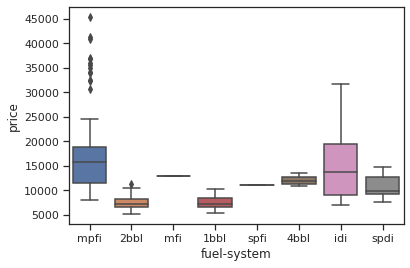

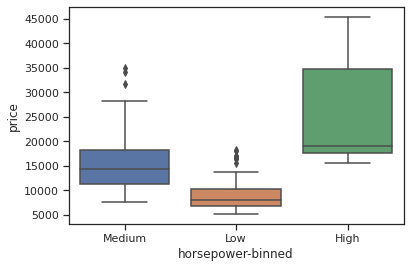

In [20]:
for i in automob1.describe(include = np.object).columns:
    sns.boxplot(x=automob1[i], y=automob1['price'])
    plt.show()

In [19]:
#here it is confusing between fwd and 4wd whereas rwd has higher mean 
#It has many outliears in std format and turbo has a higher mean 
#High has ofcourse higher mean whereas med and low have a lot of outliers
#ohcv is the best engine type for highest price and OHC has a no of outliers

**13.	What do you infer from the boxplots about the relationship between the variables.**

**Written in  the comments above**

**14.	Use describe() to get descriptive statistics of numeric variables**

In [ ]:
#Can only be used for numeric values
automob1.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


**15.	Use describe() to get stats of categorical variables**

In [ ]:
#to see object data type wale ka summary
automob1.describe(include=["object"])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


GROUPING THE VARIABLES

**16.	Get unique values in each categorical variable along with their frequency. What do you understand by doing this?**

In [24]:
for i in automob1.describe(include=np.object).columns:
    print('Column name:',i)
    print(automob1[i].value_counts())
    print("Unique values:",len(automob1[i].value_counts()) )

Column name: make
toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
saab              6
audi              6
porsche           4
alfa-romero       3
jaguar            3
chevrolet         3
isuzu             2
renault           2
mercury           1
Name: make, dtype: int64
Unique values: 22
Column name: aspiration
std      165
turbo     36
Name: aspiration, dtype: int64
Unique values: 2
Column name: num-of-doors
four    115
two      86
Name: num-of-doors, dtype: int64
Unique values: 2
Column name: body-style
sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64
Unique values: 5
Column name: drive-wheels
fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64
Unique values: 3
Column name: engine-location
f

**We can say that certain categories are popular. In aspiration- Standard is most common .4 doors is the most common variant. Sedan and hatchback are the most popular models. Car engines in the front is common and engine type of ohc with majority having 6 cylinders**

**17.	Use groupby() to get the average price of “drive-wheels” wrt “price”. What do you understand by doing this?**

In [ ]:
new1=automob1[['drive-wheels','price']]
#groupby-calculate mean of each category of drive wheels
#not taking old indexes
new1=new1.groupby(['drive-wheels'] ,as_index=False).mean()
new1

#highest price :rwd
#and fwd and 4wd are somewhat same

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


**18.	Repeat step 17 for other categorical variables.**

In [43]:
for i in automob1.describe(include=np.object).columns:
    print(automob1.groupby(i)['price'].mean())

make
alfa-romero      15498.333333
audi             17859.166667
bmw              26118.750000
chevrolet         6007.000000
dodge             7875.444444
honda             8184.692308
isuzu             8916.500000
jaguar           34600.000000
mazda            10652.882353
mercedes-benz    33647.000000
mercury          16503.000000
mitsubishi        9239.769231
nissan           10415.666667
peugot           15489.090909
plymouth          7963.428571
porsche          31400.500000
renault           9595.000000
saab             15223.333333
subaru            8541.250000
toyota            9885.812500
volkswagen       10077.500000
volvo            18063.181818
Name: price, dtype: float64
aspiration
std      12542.181818
turbo    16254.805556
Name: price, dtype: float64
num-of-doors
four    13498.034783
two     12818.127907
Name: price, dtype: float64
body-style
convertible    21890.500000
hardtop        22208.500000
hatchback       9957.441176
sedan          14459.755319
wagon          123

**19.	Use groupby() to find the average price for “drive-wheels”and”body-style” with price. Observation? Inference?**

In [42]:
new3 = automob1[['drive-wheels','body-style','price']]
pivot_new = new3.groupby(['drive-wheels','body-style'], as_index=False).mean()
pivot_new
#rwd hardtop, rwd convertile & rwd sedan are among the topest with prices >20000
#4wd hatchback sells for the lowest price of 7603 

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


**20.	Use pivot() on the result of step 19 to get “drive-wheels” as index and “body-style” as columns. Observations? Inference?**

In [35]:
#This exchanges rows and columns
pivot_results = pivot_new.pivot(index='drive-wheels', columns='body-style')
pivot_results
#Gives important infothat 4wd are not available for convetible and hardtop (which is very imp)
#4wd convertible and 4wd hardtop are not available in the dataset

price                ...                            
body-style   convertible       hardtop  ...         sedan         wagon
drive-wheels                            ...                            
4wd                  NaN           NaN  ...  12647.333333   9095.750000
fwd              11595.0   8249.000000  ...   9811.800000   9997.333333
rwd              23949.6  24202.714286  ...  21711.833333  16994.222222

[3 rows x 5 columns]

**21.	Repeat step 19 & 20 for other combinations of independent variables wrt price. Observations? Inferences?**

In [41]:
#there will be no  nan in normal groupby mean as in normal table...those price which are not wriiten only
redundant = []
for i in automob1.describe(include=np.object).columns:
    redundant.append(i)
    for j in automob1.describe(include=np.object).columns:
      if i==j or j in redundant:
        continue
      else:
        new=automob1[[i,j,'price']]
        pivot_new1=new.groupby([i,j],as_index=False).mean()
        print(pivot_new1,end='\n\n')
        print("Now pivoting :",i,'&',j,end='\n\n')
        pivot_results1=pivot_new1.pivot(index=i,columns=j)
        pivot_results1.replace(np.nan, '---', inplace= True)
        print(pivot_results1,end="\n\n")
#no of cyinders :2,3,8,12 are not available in turbo-type aspiration whereas std has all the no-of-cylinders vehicles

             make aspiration         price
0     alfa-romero        std  15498.333333
1            audi        std  16656.000000
2            audi      turbo  23875.000000
3             bmw        std  26118.750000
4       chevrolet        std   6007.000000
5           dodge        std   6900.000000
6           dodge      turbo   9826.333333
7           honda        std   8184.692308
8           isuzu        std   8916.500000
9          jaguar        std  34600.000000
10          mazda        std  10652.882353
11  mercedes-benz        std  38900.000000
12  mercedes-benz      turbo  28394.000000
13        mercury      turbo  16503.000000
14     mitsubishi        std   7314.714286
15     mitsubishi      turbo  11485.666667
16         nissan        std   9869.588235
17         nissan      turbo  19699.000000
18         peugot        std  14649.000000
19         peugot      turbo  16189.166667
20       plymouth        std   7004.600000
21       plymouth      turbo  10360.500000
22        p

**22.	Draw heatmap for result of step20**

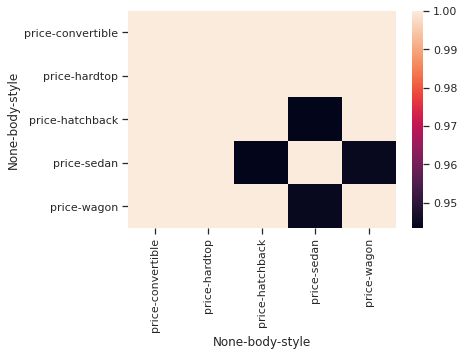

In [39]:
relation=pivot_results.corr()
sns.heatmap(relation)
plt.show()

**23.	Calculate the pearson correlation between “wheel-base” and “price”. What can you conclude from p-value (Hint: use stats from scipy which has pearsonr())**

In [ ]:
from scipy import stats

pearson_coeff, p_value = stats.pearsonr(automob1['wheel-base'], automob1['price'])#(x,y)

In [ ]:
#p < 0.001 - strong evidence that corr is significant
#p < 0.05 - moderat e evidence that corr is significant
# p < 0.1 - weak evidence that corr is significant
#p > 0.1 - no evidence that corr is significant

print(pearson_coeff)
print(p_value)
#since P-value< 0.001 hence strong evidence that corr is significant

0.584641822265508
8.076488270733218e-20


**24.	Perform one way ANOVA test using f_oneway() of stats to check if different groups of “drive-wheels” are correlated with “price”. What do you understand from F-test and p-value results?**

In [ ]:
# one way anova test
#f-score: larger score better
#p-value: lower means more evidence
f_val,p_val=stats.f_oneway(automob1['price'][automob1['drive-wheels'] == 'fwd'],
               automob1['price'][automob1['drive-wheels'] == 'rwd'],
               automob1['price'][automob1['drive-wheels'] == '4wd'])
print("F-Value: ",f_val)
print("P-Value: ",p_val)

#THESE 3 ARE SIGNIFICIANT DIFFERENT AND DIFFERENT MEANS OF 4WD,FWD,RWD drive-wheels 

F-Value:  67.95406500780399
P-Value:  3.3945443577151245e-23


In [ ]:

f_val,p_val=stats.f_oneway(automob1['price'][automob1['drive-wheels'] == 'fwd'],
               automob1['price'][automob1['drive-wheels'] == 'rwd'])
print("F-Value: ",f_val)
print("P-Value: ",p_val)
#FWD and Rwd are significantly different from each other

f_val,p_val=stats.f_oneway(automob1['price'][automob1['drive-wheels'] == 'fwd'],
               automob1['price'][automob1['drive-wheels'] == '4wd'])
print("F-Value: ",f_val)
print("P-Value: ",p_val)
#fwd and 4wd are not so significantly  different from each other

f_val,p_val=stats.f_oneway(automob1['price'][automob1['drive-wheels'] == '4wd'],
               automob1['price'][automob1['drive-wheels'] == 'rwd'])
print("F-Value: ",f_val)
print("P-Value: ",p_val)
#4wd and rwd are different from each 
#So fwd and 4wd can be merged into 1(Just optional)

F-Value:  130.5533160959111
P-Value:  2.2355306355677845e-23
F-Value:  0.6654657502523033
P-Value:  0.41620116697845666
F-Value:  8.580681368924756
P-Value:  0.004411492211225333
